<a href="https://colab.research.google.com/github/rrhkwk123/Work/blob/main/case_study_01_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import python as well as k-learn and its clustering methods and datetime for date functions.
from datetime import date
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import altair as alt
import seaborn as sns

hr = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/hr.csv")

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# created new datetime object collumns
hr['dateHireObj'] = pd.to_datetime(hr['DateofHire'])
hr['dateTermObj'] = pd.to_datetime(hr['DateofTermination'])

In [ ]:
# filling in workers who had not be terminated with today's date
ct = date.today()
temp = hr.select_dtypes(include=['datetime'])
hr[temp.columns] = temp.fillna(pd.to_datetime(ct))

In [ ]:
# create months worked column
hr['monthsWorked'] = (hr['dateTermObj'].dt.year - hr['dateHireObj'].dt.year) * 12 + (hr['dateTermObj'].dt.month - hr['dateHireObj'].dt.month)


In [ ]:
# normalize the first employee engagement survey so the numbers match the satisfaction survey
hr['EngagementSurvey'] = hr['EngagementSurvey'] * 10

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f31b34e64e0>,
                 k=None, metric=None, model=None, timings=True)

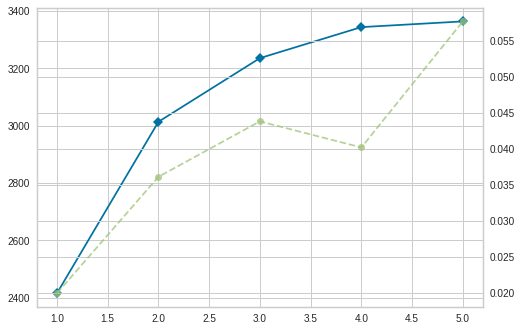

In [ ]:
# make some clusters
model = KMeans()
vis = KElbowVisualizer(model, k=(1,6))
vis.fit(hr[['EngagementSurvey', 'EmpSatisfaction2', 'monthsWorked']])

In [ ]:
# creating our labels from our clusters
kmeans = KMeans(n_clusters = 3)
hr['label'] = kmeans.fit_predict(hr[['monthsWorked', 'EngagementSurvey', 'EmpSatisfaction2']])

In [ ]:
# creating a graph based on the employee's engagement and time at the office
engagement = alt.Chart(hr).mark_circle().encode(
    x='monthsWorked',
    y='EngagementSurvey',
    color='label:N'
)

engagement

alt.Chart(...)

In [ ]:
satisfaction = alt.Chart(hr).mark_circle().encode(
    x='monthsWorked',
    y='EmpSatisfaction2',
    color='label:N',
    tooltip=(['Employee_Name', 'TermReason', 'EmploymentStatus', 'monthsWorked'])
)

satisfaction

alt.Chart(...)

In [ ]:
engagement | satisfaction

alt.HConcatChart(...)

What coorelation can we make? 

- Shorter length of employment tends to be happier
- Mid length of employment is all over the place but noticably lower than short and long term employment clusters
- Mid term ends at 80 months almost abruptly
- Long term tend to be very happy

GOAL 1 - Find similarities between those in each cluster of satisfaction

In [ ]:
long_term = hr[hr['label'] == 0]
mid_term = hr[hr['label'] == 1]
short_term = hr[hr['label'] == 2]

long_term

# long_term['Sex'].value_counts()
# mid_term['Sex'].value_counts()
# short_term['Sex'].value_counts()

# Does pay rate affect the clusters?

# Does gender affect the satisfaction or the length of time at the company?
long_term['Sex'].value_counts(normalize=True)
mid_term['Sex'].value_counts(normalize=True)
short_term['Sex'].value_counts(normalize=True)


# Does the performance score of an employee lead to better satisfaction?

# Does the manager make a difference in the satisfaction of an employee?

F     0.535433
M     0.464567
Name: Sex, dtype: float64

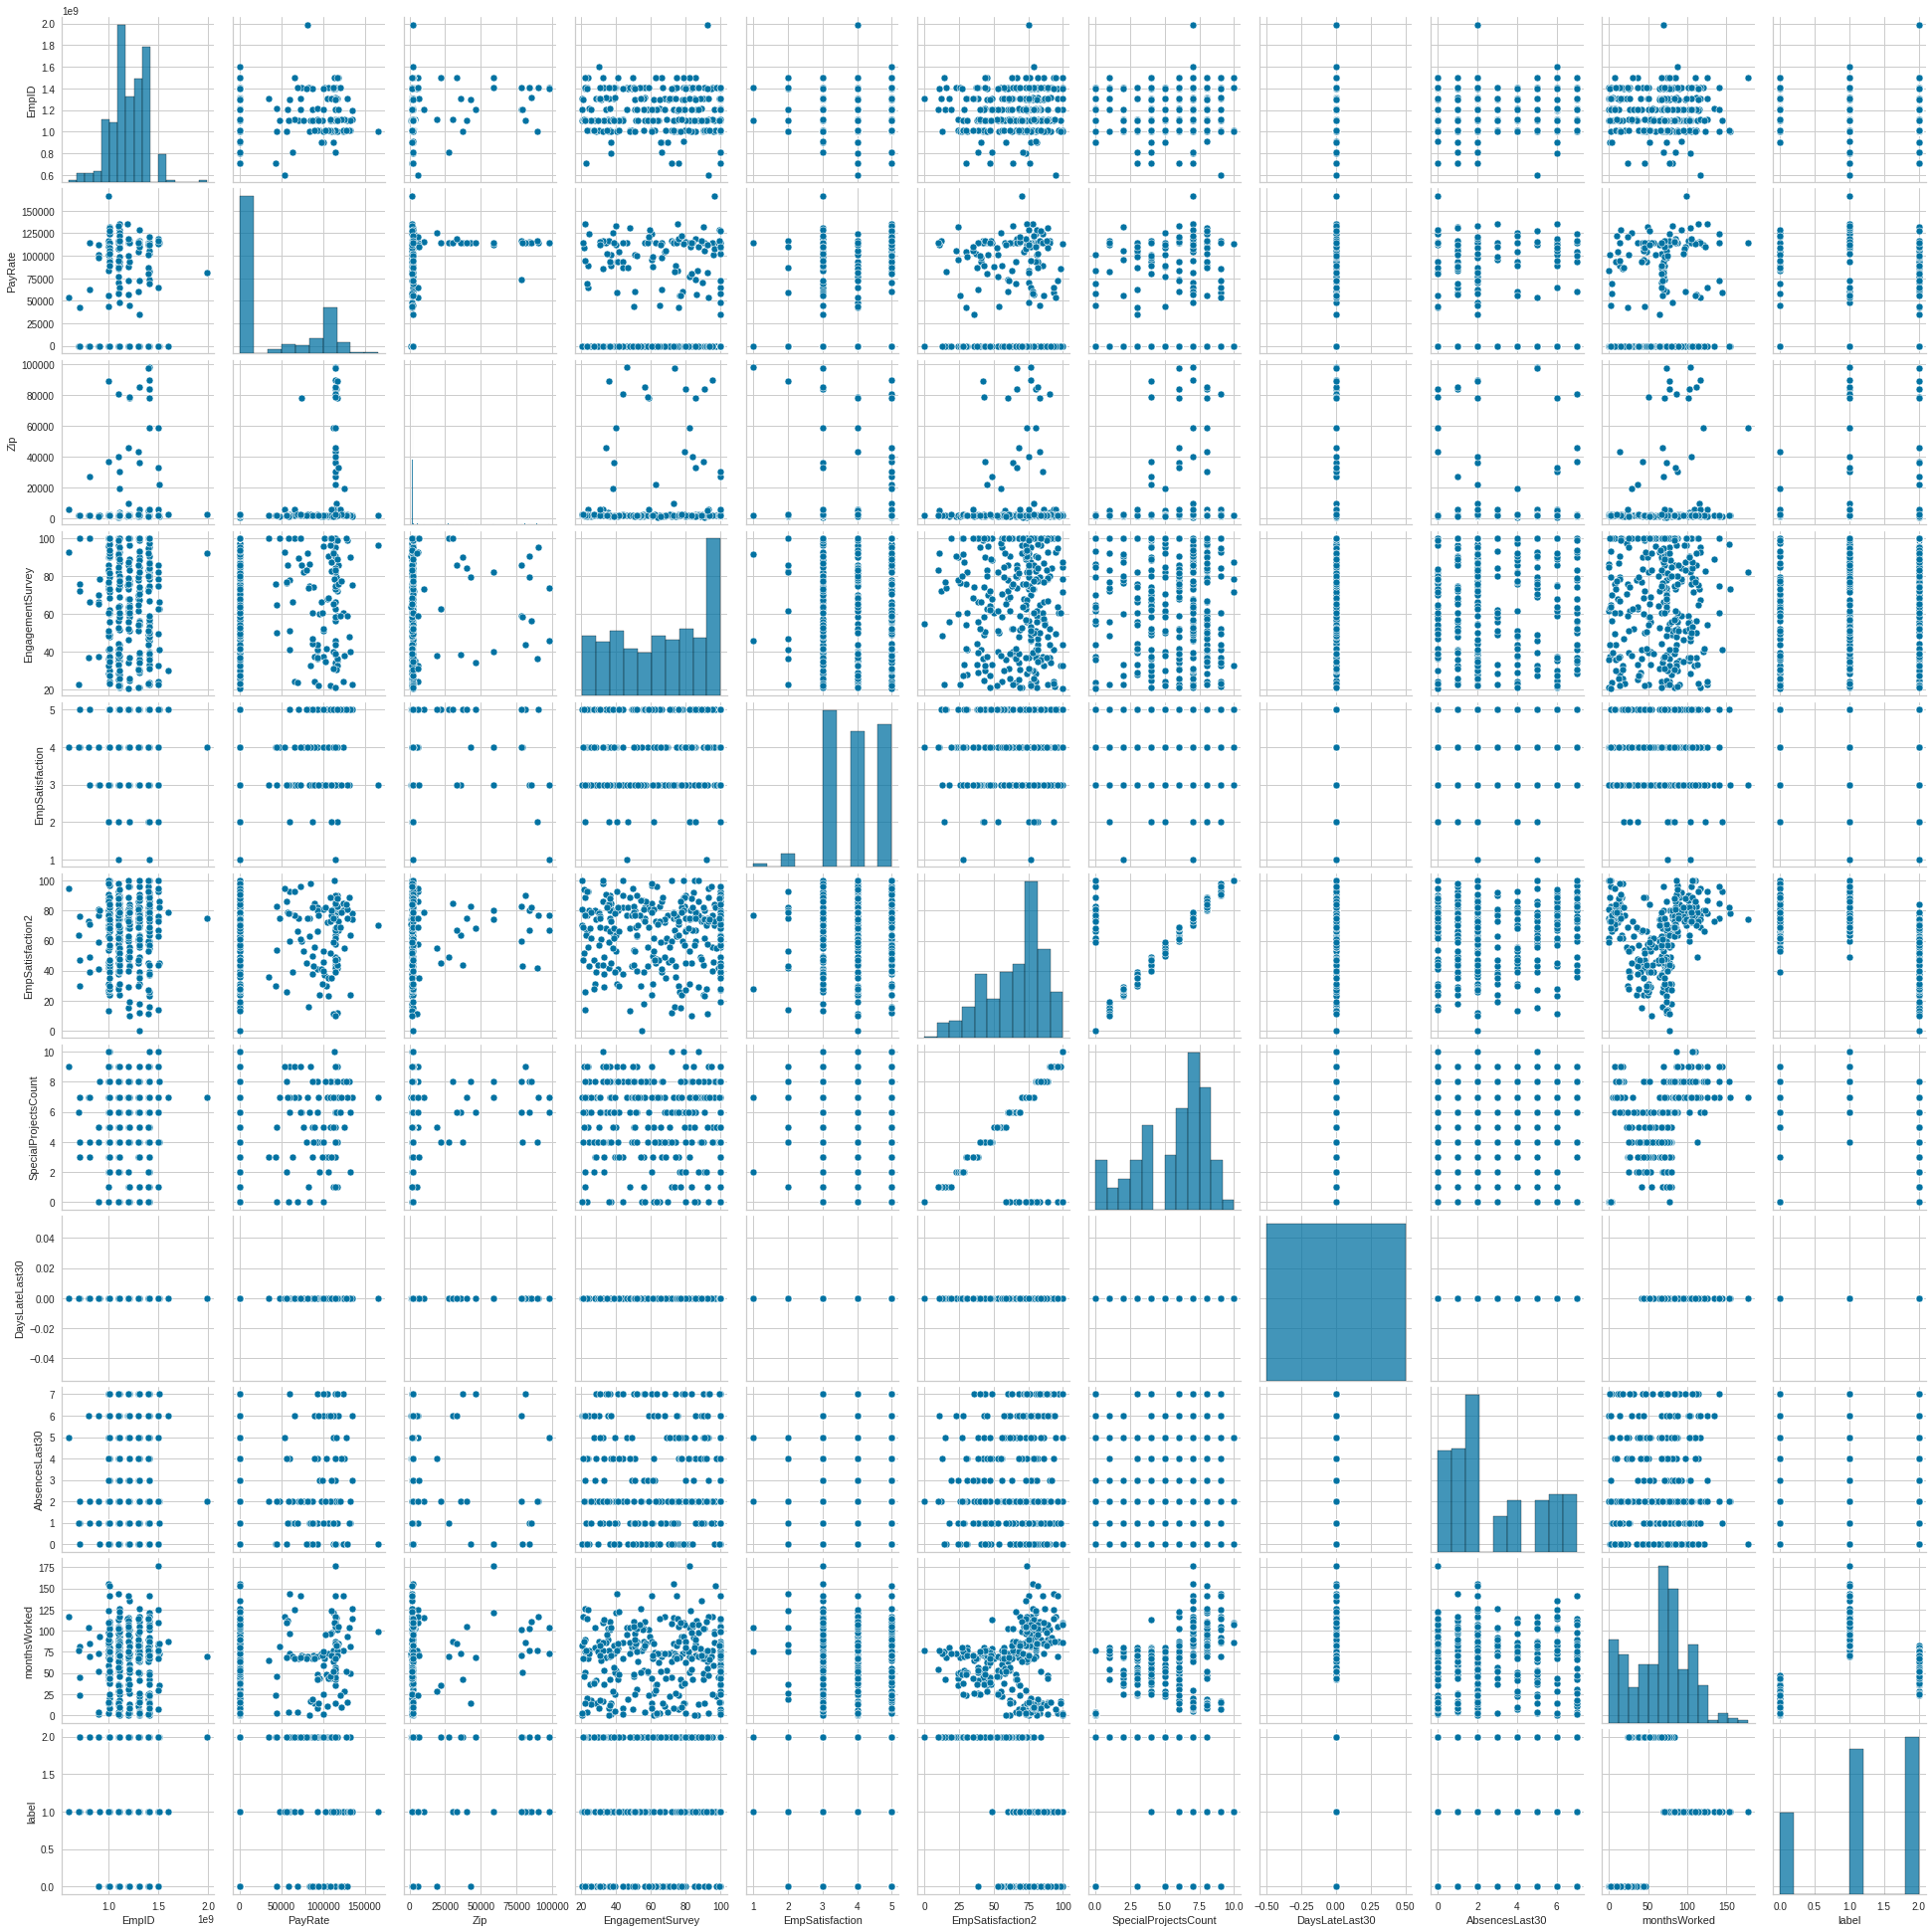

In [ ]:

sns.pairplot(hr)

In [ ]:
satisfaction2 = alt.Chart(hr).mark_point().encode(
    x='monthsWorked',
    y='EmpSatisfaction2',
    shape = 'label:N',
    tooltip=(['Employee_Name', 'TermReason', 'EmploymentStatus', 'monthsWorked','SpecialProjectsCount'])
)

satisfaction3 = alt.Chart(hr).mark_circle().encode(
    x='monthsWorked',
    y='EmpSatisfaction2',
    color='SpecialProjectsCount:N'
)

satisfaction2 + satisfaction3 
#TermReason ?
#EmploymentStatus ?
#PerformanceScore ?
#AbsencesLast30 ?


alt.LayerChart(...)

In [ ]:
# hr.info()
# hr['label'].value_counts(normalize=True)

2    0.409677
1    0.377419
0    0.212903
Name: label, dtype: float64

In [ ]:
#long_term['AbsencesLast30'].value_counts(normalize=True)
#mid_term['AbsencesLast30'].value_counts(normalize=True)
#short_term['AbsencesLast30'].value_counts(normalize=True)

2    0.242424
0    0.196970
1    0.136364
7    0.121212
6    0.106061
4    0.106061
5    0.075758
3    0.015152
Name: AbsencesLast30, dtype: float64

In [ ]:
# import pandas as pd
# import seaborn as sns
# ## Import the Data
# hrdata = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/hr.csv', usecols=['PayRate','Sex'])

In [ ]:
# for index in hrdata.index:
#   if hrdata.loc[index, 'PayRate'] < 100: #Probably a cap in hourly rate
#     hrdata.loc[index, 'PayRate'] *= 2080

# hrdata.value_counts()
# hr['PayRate'].value_counts

<bound method IndexOpsMixin.value_counts of 0       59280.0
1       47840.0
2       60320.0
3       44720.0
4       34444.8
         ...   
305    112528.0
306    116896.0
307    111904.0
308    110240.0
309    114816.0
Name: PayRate, Length: 310, dtype: float64>